In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from subprocess import check_output

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

all_data size is : (2919, 79)
              Missing Ratio
PoolQC               99.657
MiscFeature          96.403
Alley                93.217
Fence                80.439
FireplaceQu          48.647
LotFrontage          16.650
GarageQual            5.447
GarageCond            5.447
GarageFinish          5.447
GarageYrBlt           5.447
GarageType            5.379
BsmtExposure          2.809
BsmtCond              2.809
BsmtQual              2.775
BsmtFinType2          2.741
BsmtFinType1          2.706
MasVnrType            0.822
MasVnrArea            0.788
MSZoning              0.137
BsmtFullBath          0.069
BsmtHalfBath          0.069
Utilities             0.069
Functional            0.069
Electrical            0.034
BsmtUnfSF             0.034
Exterior1st           0.034
Exterior2nd           0.034
TotalBsmtSF           0.034
GarageArea            0.034
GarageCars            0.034
BsmtFinSF2            0.034
BsmtFinSF1            0.034
KitchenQual           0.034
SaleType          

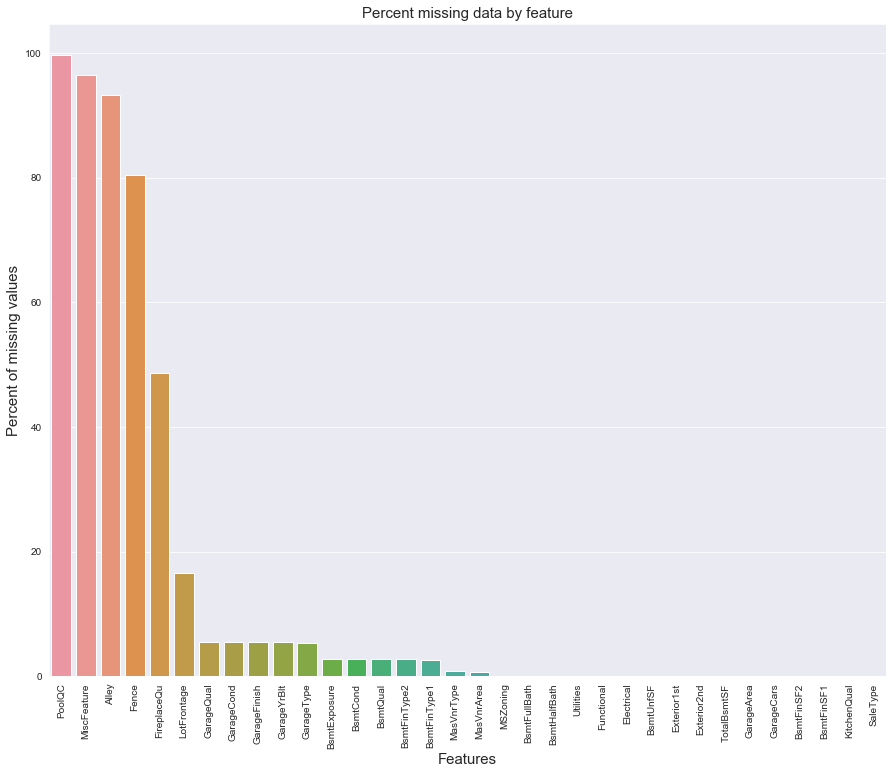

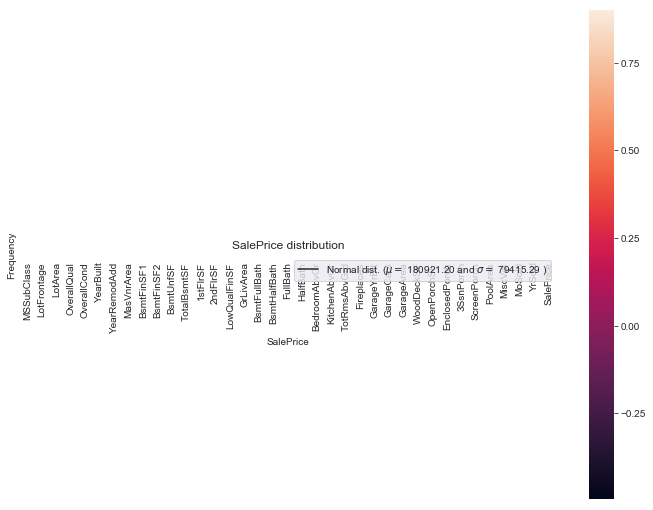

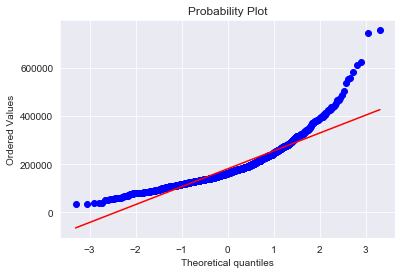

KeyError: 'the label [G] is not in the [columns]'

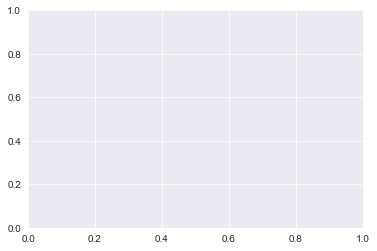

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from subprocess import check_output
from scipy.stats import norm, skew
from scipy import stats

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

class explore_data():
    def __init__(self, train, test, target):
        self.train = train
        self.test = test
        self.train_ID = self.train.loc[:, 'Id']
        self.test_ID = self.test.loc[:, 'Id']
        self.train.drop("Id", axis = 1, inplace = True)
        self.test.drop("Id", axis = 1, inplace = True)
        self.target = target
        self.y_train = self.train.loc[:,self.target]
        self.y_test = self.test.loc[:,self.target]
    
    def data_combine(self):
        self.ntrain = self.train.shape[0]
        self.ntest = self.test.shape[0]
        #### Learn to automate var pulled out ####
        self.y_train = train.loc[:, self.target].values
        self.all_data = pd.concat((self.train, self.test)).reset_index(drop=True)
        self.y_all_data = self.all_data.loc[:, self.target]
        self.all_data.drop([self.target], axis=1, inplace=True)
        print('all_data size is : {}'.format(self.all_data.shape))
        return self
              
    def missing_data(self, numdisp=40):
        all_data_na = (self.all_data.isnull().sum() / len(self.all_data)) * 100
        all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:numdisp]
        missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
        try:
            print(missing_data.head(numdisp))
        except:
            print('Can\'t display this much missing data')
        f, ax = plt.subplots(figsize=(15, 12))
        plt.xticks(rotation='90')
        sns.barplot(x=all_data_na.index, y=all_data_na)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
        return self
        
        
    def plot_single_relation(self, var):
        """
        Use this function to plot single regression relationship, use of you know
        correlation between var and target is high, can be used to identify easy 
        outliers in the data. 
        """
        fig, ax = plt.subplots()
        ax.scatter(x=self.train.loc[:,var], y=self.y_train)
        plt.ylabel(target, fontsize=13)
        plt.xlabel(var, fontsize=13)
        plt.show()
    
    def fit_norm(self, var):
        sns.distplot(self.train.loc[:, var], fit=norm);
        # Get the fitted parameters used by the function
        (mu, sigma) = norm.fit(self.train.loc[:, var])
        print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
        
        #Now plot the distribution
        plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                    loc='best')
        plt.ylabel('Frequency')
        plt.title('SalePrice distribution')
        
        #Get also the QQ-plot
        fig = plt.figure()
        res = stats.probplot(self.train[var], plot=plt)
        plt.show()
    
    def mass_correlation(self):
        corrmat = train.corr()
        plt.subplots(figsize=(12,9))
        sns.heatmap(corrmat, vmax=.9, square=True)
    
    def visualize_data(self, relation=None):
        self.data_combine()
        self.missing_data()
        self.mass_correlation()
        self.fit_norm(self.target)
        if relation:
            for rel in tuple(relation):
                self.plot_single_relation(rel)
                
    
    
class modify_data(explore_data):
    def __init__(self, train, test, target):
        self.train = train
        self.test = test
        super().__init__(train, test, target)
        
    def remove_outliers(self):
        train = self.train.drop(self.train[(self.train['GrLivArea']>4000) & (self.train['SalePrice']<300000)].index)
        
    def log1p_tranform(self, var):
        #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
        self.train.loc[:, var] = np.log1p(self.train[var])
        #Check the new distribution 
        self.fit_norm(var)
        return self
              
    def fill_na_none(self, cols, fill="None"):
        cols = list(cols)
        self.alldata.loc[:, cols] = all_data.loc[:, cols].fillna(fill)
        return self
    
    def fill_na_0(self, cols, fill=0):
        self.fill
    
    def fill_na_value(self, cols, key):
        if key is "mean":
            pass
        elif key is "median":
            self.all_data[cols[0]] = self.all_data.groupby(col[1])[col[0]].transform(lambda x: x.fillna(x.median()))
        elif key is "mode":
            self.all_data[cols[0]] = self.all_data.groupby(col[1])[col[0]].transform(lambda x: x.fillna(x.mode()))
        else: 
            print("Cannot fill in values due to improper key {}".format(key))
            pass
              
 

# Main 
ob = modify_data(train, test, 'SalePrice')
ob.visualize_data(relation='GrLivArea')

              
              
fillnone = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 
            'GarageFinish', 'GarageQual', 'GarageCond']

fillmed = ('LotFrontage', 'Neighborhood')